In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("speeddating.csv")

In [3]:
df.shape

(8378, 123)

In [4]:
df.columns.values

array(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace', 'importance_same_race',
       'importance_same_religion', 'd_importance_same_race',
       'd_importance_same_religion', 'field', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious',
       'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'attractive_important',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'shared_interests_important',
       'd_attractive_important', 'd_sincere_important',
       'd_intellicence_impor

In [ ]:
df.dtypes

has_null               int64
wave                   int64
gender                object
age                   object
age_o                 object
                       ...  
d_guess_prob_liked    object
met                   object
decision               int64
decision_o             int64
match                  int64
Length: 123, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: int64(7), object(116)
memory usage: 7.9+ MB


In [ ]:
df.head

<bound method NDFrame.head of       has_null  wave  gender age age_o  d_age d_d_age  \
0            0     1  female  21    27      6   [4-6]   
1            0     1  female  21    22      1   [0-1]   
2            1     1  female  21    22      1   [0-1]   
3            0     1  female  21    23      2   [2-3]   
4            0     1  female  21    24      3   [2-3]   
...        ...   ...     ...  ..   ...    ...     ...   
8373         1    21    male  25    26      1   [0-1]   
8374         1    21    male  25    24      1   [0-1]   
8375         1    21    male  25    29      4   [4-6]   
8376         1    21    male  25    22      3   [2-3]   
8377         1    21    male  25    22      3   [2-3]   

                                         race  \
0     'Asian/Pacific Islander/Asian-American'   
1     'Asian/Pacific Islander/Asian-American'   
2     'Asian/Pacific Islander/Asian-American'   
3     'Asian/Pacific Islander/Asian-American'   
4     'Asian/Pacific Islander/Asian-Amer

In [ ]:
df['gender']

0       female
1       female
2       female
3       female
4       female
         ...  
8373      male
8374      male
8375      male
8376      male
8377      male
Name: gender, Length: 8378, dtype: object

In [7]:
print(df['has_null'].mean())
percent_null_inst=[]
columns_removed=[]
columns_removed.append(0)
percent_null_inst.append(df['has_null'].mean())

0.8749104798281213


In [8]:
print(df['decision'].mean())
print(df['decision_o'].mean())
print(df['match'].mean())
#Target class Match is imbalanced
#Also we can use decision and decision_o as target classes
#One way to actually do this is to make our model to actually predict 2 outputs for decision and decision_o 
#which infact will be used to predict Target Match with logical.
#Else we can train separate decision and decision_o with their respective best models and use their prediction to get Match
#Else treat each of these 3 target classes separately and get best models for each of them independently

0.41990928622582957
0.41955120553831465
0.16471711625686322


In [9]:
column_names=df.columns.to_list()
type(column_names)

list

In [10]:
target_classes=[]
target_classes.append(column_names.pop(-1))
target_classes.append(column_names.pop(-1))
target_classes.append(column_names.pop(-1))
target_classes.reverse()
target_classes

['decision', 'decision_o', 'match']

In [11]:
dictionary={}
for each in column_names:
    counts=df[each].value_counts().to_dict()
    if "?" in counts.keys():
        dictionary[each]=counts["?"]
    else:
        dictionary[each]=0
dictionary

#Based on below values, it's better to leave out features 'expected_num_interested_in_me', 'expected_num_matches'
# and shared_interests_partner
#This should significanlty decrease the number of instances with missing values from 87.5% 

{'age': 95,
 'age_o': 104,
 'ambition': 105,
 'ambition_partner': 712,
 'ambitous_o': 722,
 'ambtition_important': 99,
 'art': 79,
 'attractive': 105,
 'attractive_important': 79,
 'attractive_o': 212,
 'attractive_partner': 202,
 'clubbing': 79,
 'concerts': 79,
 'd_age': 0,
 'd_ambition': 0,
 'd_ambition_partner': 0,
 'd_ambitous_o': 0,
 'd_ambtition_important': 0,
 'd_art': 0,
 'd_attractive': 0,
 'd_attractive_important': 0,
 'd_attractive_o': 0,
 'd_attractive_partner': 0,
 'd_clubbing': 0,
 'd_concerts': 0,
 'd_d_age': 0,
 'd_dining': 0,
 'd_exercise': 0,
 'd_expected_happy_with_sd_people': 0,
 'd_expected_num_interested_in_me': 0,
 'd_expected_num_matches': 0,
 'd_funny': 0,
 'd_funny_important': 0,
 'd_funny_o': 0,
 'd_funny_partner': 0,
 'd_gaming': 0,
 'd_guess_prob_liked': 0,
 'd_hiking': 0,
 'd_importance_same_race': 0,
 'd_importance_same_religion': 0,
 'd_intellicence_important': 0,
 'd_intelligence': 0,
 'd_intelligence_o': 0,
 'd_intelligence_partner': 0,
 'd_interests_

In [12]:
dic={k: v for k, v in sorted(dictionary.items(),reverse=True, key=lambda item: item[1])}
keys=list(dic.keys())
values=list(dic.values())
type(values)

list

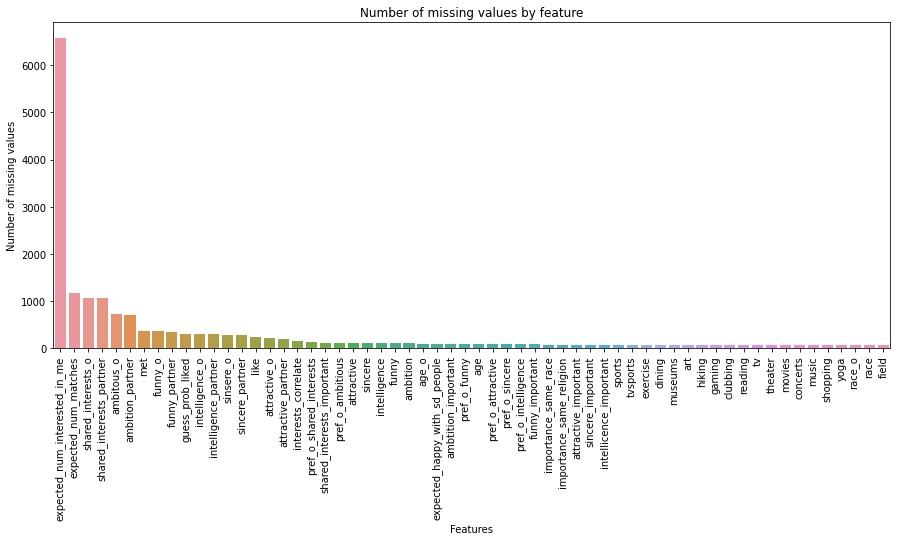

In [16]:
count = 0
for each in values:
    if each>0:
        count+=1
keys=keys[:count]
values=values[:count]

fig, ax = plt.subplots(figsize=(15, 6))
  
# drawing the plot
# sns.barplot(x, y, ax=ax)
# plt.show()

p=sns.barplot(keys,values,ax=ax)
p.tick_params(axis='x', rotation=90)
plt.title("Number of missing values by feature")
plt.xlabel("Features")
plt.ylabel("Number of missing values")
plt.show()

In [17]:
df_trunc=df.drop(['expected_num_interested_in_me', 'expected_num_matches'], axis=1)

In [18]:
df_trunc

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,male,25,26,1,[0-1],European/Caucasian-American,'Latino/Hispanic American',0,...,[0-3],[3-5],2,5,[0-5],[5-6],0,0,1,0
8374,1,21,male,25,24,1,[0-1],European/Caucasian-American,Other,0,...,[0-3],[3-5],4,4,[0-5],[0-4],0,0,0,0
8375,1,21,male,25,29,4,[4-6],European/Caucasian-American,'Latino/Hispanic American',0,...,[0-3],[3-5],6,5,[6-8],[5-6],0,0,0,0
8376,1,21,male,25,22,3,[2-3],European/Caucasian-American,'Asian/Pacific Islander/Asian-American',0,...,[0-3],[3-5],5,5,[0-5],[5-6],0,0,1,0


In [19]:
trunc_cols=df_trunc.columns.to_list()
for index, row in df_trunc.iterrows():
    # print(index)
    nan_present=0
    for each in trunc_cols:
        if str(df_trunc.iloc[index][each])=="?":
            df_trunc.at[index,'has_null']=1
            nan_present=1
            break
    if nan_present==0:
        df_trunc.at[index,'has_null']=0
        


In [20]:
print(df_trunc['has_null'].mean())
columns_removed.append(2)
percent_null_inst.append(df_trunc['has_null'].mean())

0.3295535927428981


In [21]:
dictionary_trunc={}
for each in trunc_cols:
    counts=df_trunc[each].value_counts().to_dict()
    if "?" in counts.keys():
        dictionary_trunc[each]=counts["?"]
    else:
        dictionary_trunc[each]=0
dictionary_trunc

{'age': 95,
 'age_o': 104,
 'ambition': 105,
 'ambition_partner': 712,
 'ambitous_o': 722,
 'ambtition_important': 99,
 'art': 79,
 'attractive': 105,
 'attractive_important': 79,
 'attractive_o': 212,
 'attractive_partner': 202,
 'clubbing': 79,
 'concerts': 79,
 'd_age': 0,
 'd_ambition': 0,
 'd_ambition_partner': 0,
 'd_ambitous_o': 0,
 'd_ambtition_important': 0,
 'd_art': 0,
 'd_attractive': 0,
 'd_attractive_important': 0,
 'd_attractive_o': 0,
 'd_attractive_partner': 0,
 'd_clubbing': 0,
 'd_concerts': 0,
 'd_d_age': 0,
 'd_dining': 0,
 'd_exercise': 0,
 'd_expected_happy_with_sd_people': 0,
 'd_expected_num_interested_in_me': 0,
 'd_expected_num_matches': 0,
 'd_funny': 0,
 'd_funny_important': 0,
 'd_funny_o': 0,
 'd_funny_partner': 0,
 'd_gaming': 0,
 'd_guess_prob_liked': 0,
 'd_hiking': 0,
 'd_importance_same_race': 0,
 'd_importance_same_religion': 0,
 'd_intellicence_important': 0,
 'd_intelligence': 0,
 'd_intelligence_o': 0,
 'd_intelligence_partner': 0,
 'd_interests_

In [22]:
df_2_trunc=df_trunc.drop(['shared_interests_o', 'shared_interests_partner'], axis=1)

In [23]:
trunc_2_cols=df_2_trunc.columns.to_list()
for index, row in df_2_trunc.iterrows():
    nan_present=0
    for each in trunc_2_cols:
        if str(df_2_trunc.iloc[index][each])=="?":
            df_2_trunc.at[index,'has_null']=1
            nan_present=1
            break
    if nan_present==0:
        df_2_trunc.at[index,'has_null']=0
print(df_2_trunc['has_null'].mean())
columns_removed.append(4)
percent_null_inst.append(df_2_trunc['has_null'].mean())
# Dropped from 87.5% to 22.8%

0.2282167581761757


In [ ]:
#From this points, I think exploring encoding should do us more benefit than dropping any more columns or rows actually!

Those Columns/features are removed in which we observed highest number of missing values


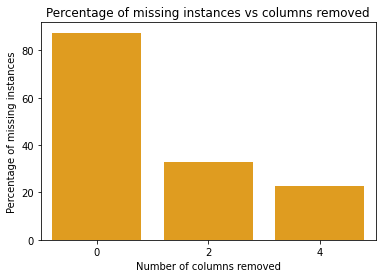

In [ ]:
import numpy as np
percent_null_inst = np.array(percent_null_inst)
p=sns.barplot(columns_removed,percent_null_inst*100,color="orange")
p.set_title("Percentage of missing instances vs columns removed")
p.set_xlabel("Number of columns removed")
p.set_ylabel("Percentage of missing instances")
print("Those Columns/features are removed in which we observed highest number of missing values")

In [ ]:
df_3_trunc=df_2_trunc.drop(['ambitous_o', 'ambition_partner'], axis=1)

In [ ]:
trunc_3_cols=df_3_trunc.columns.to_list()
for index, row in df_3_trunc.iterrows():
    nan_present=0
    for each in trunc_3_cols:
        if str(df_3_trunc.iloc[index][each])=="?":
            df_3_trunc.at[index,'has_null']=1
            nan_present=1
            break
    if nan_present==0:
        df_3_trunc.at[index,'has_null']=0
print(df_3_trunc['has_null'].mean())
columns_removed.append(6)
percent_null_inst=list(percent_null_inst)
percent_null_inst.append(df_3_trunc['has_null'].mean())
# Dropped from 87.5% to 22.8%

0.15504893769396036


In [ ]:
print(df_3_trunc['has_null'].mean())
columns_removed.append(6)
percent_null_inst=list(percent_null_inst)
percent_null_inst.append(df_3_trunc['has_null'].mean())

0.15504893769396036


In [ ]:
print(columns_removed)
print(percent_null_inst)
columns_removed.pop(-1)

[0, 2, 4, 6, 6]
[0.8749104798281213, 0.3295535927428981, 0.2282167581761757, 0.15504893769396036, 0.15504893769396036]


6

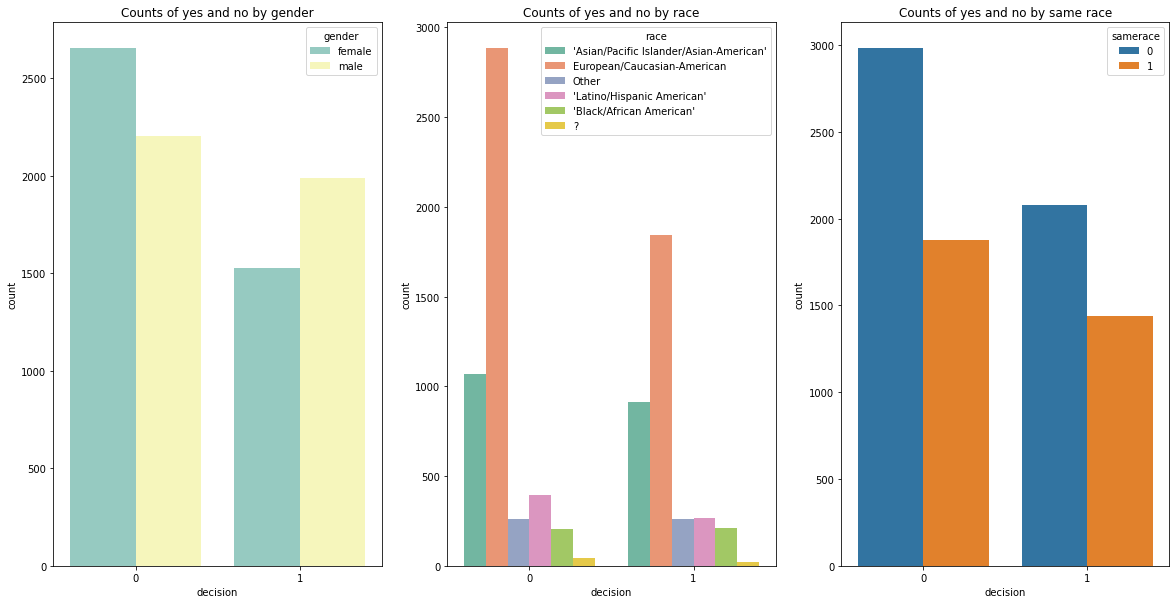

In [28]:
fig,ax = plt.subplots(1,3, figsize = (20,10))
sns.countplot(data = df, x = "decision", hue = "gender", ax = ax[0], palette = "Set3")
sns.countplot(data = df, x = "decision", hue = "race", ax = ax[1], palette = "Set2")
sns.countplot(data = df, x = "decision", hue = "samerace", ax = ax[2])
ax[0].set_title("Counts of yes and no by gender")
ax[1].set_title("Counts of yes and no by race")
ax[2].set_title("Counts of yes and no by same race");

**Explanation:** 
The barplots display the number of yes and no that a given individual says at the end of the meeting, categorized by the individual's gender and race. There is a clear distinction between males and females, in terms of how prone to each gender says yes or no. We can note that males are more likely to decide to meet their date again. The distinction is less obvious for the race attribute, where the proportion of people saying yes or no is roughly the same for different racial statuses. However, if both of the individual and the partner have the same race, the probability of saying yes is higher than the case where they are of different races. The "?" sign represents that the individual's race is missing.


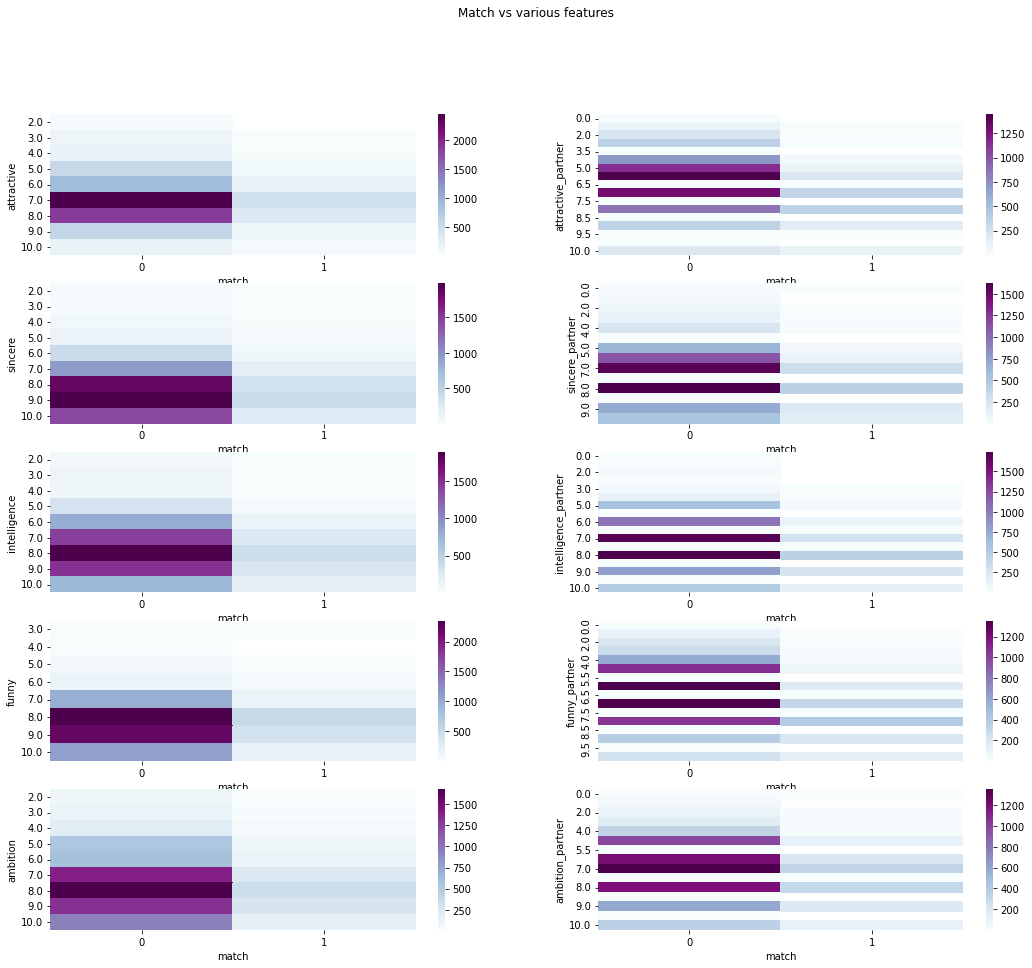

In [33]:
numerical_columns_1 = ["attractive","attractive_partner", 
                       "sincere", "sincere_partner",
                       "intelligence","intelligence_partner",
                       "funny", "funny_partner", 
                       "ambition","ambition_partner"]

fig, ax = plt.subplots(5,2, figsize = (18,15))
for var, subplot in zip(numerical_columns_1, ax.flatten()):
    data = df[df[var] != "?"]
    data[var] = data[var].astype("float").sort_values(ascending = False)
    data = data.groupby([var, "match"]).count()["has_null"].unstack()
    sns.heatmap(data = data, ax = subplot, cmap = "BuPu")
plt.suptitle("Match vs various features")
plt.show()

**Explanation:**

The heatmap plots the distribution of people's ratings of their own as well as their date's attractiveness, sincerity, intelligence, funniness, and ambition against whether there is a match made at the end of the meeting. We can clearly see that there is discrepancy in people's ratings of themselves and their partners: their ratings of their partners are lower on average. However, the exact magnitude of the value of the ratings do not significantly affect whether there is a match: more matches are made if ratings are higher, but this is partly due to the fact that a higher proportion of people give higher ratings anyway.

In [ ]:
df_2_trunc=df_trunc.drop(columns='has_null', axis=1)

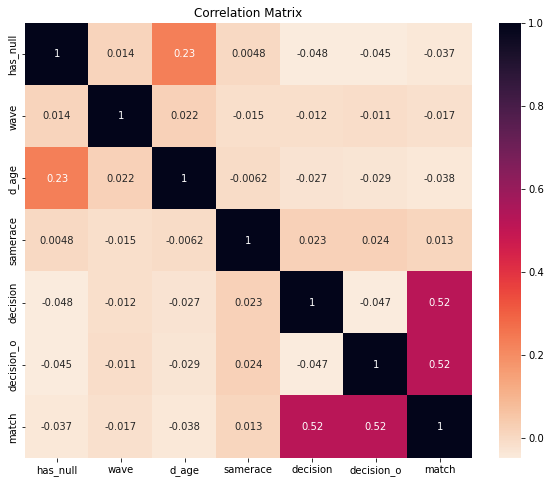

In [34]:
#looking at correlations 
plt.figure(figsize=(10,8))
sns.heatmap(df_2_trunc.corr(), annot=True,cmap = sns.cm.rocket_r)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_matrix = df.corr()
# we get rid of the upper triangle to make it easier to look for maximum values
corr_matrix = corr_matrix.mask(np.triu(np.ones(corr_matrix.shape)).astype(bool))
corr_matrix

,has_null,wave,d_age,samerace,decision,decision_o,match
has_null,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wave,0.529313,NaN,NaN,NaN,NaN,NaN,NaN
d_age,0.094874,0.022024,NaN,NaN,NaN,NaN,NaN
samerace,-0.016382,-0.014967,-0.006238,NaN,NaN,NaN,NaN
decision,-0.002146,-0.011598,-0.026940,0.023036,NaN,NaN,NaN
decision_o,-0.009000,-0.010831,-0.028545,0.023626,-0.047038,NaN,NaN
match,-0.013011,-0.017404,-0.038239,0.013028,0.521943,0.522326,NaN


In [ ]:
#analyzing age of participants
df['age'].astype

<bound method NDFrame.astype of 0       21
1       21
2       21
3       21
4       21
        ..
8373    25
8374    25
8375    25
8376    25
8377    25
Name: age, Length: 8378, dtype: object>

In [ ]:
df['age'] = pd.to_numeric(df['age'],errors = 'coerce')

In [ ]:
df['age'].mean()

26.358927924664975

In [ ]:
df["age"] = df["age"].fillna(round(df["age"].mean(),1))
df["age"] = df["age"].astype(int)

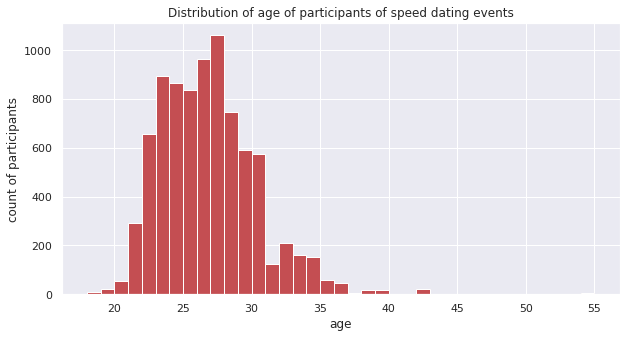

In [ ]:
bins = np.arange(df.age.min(),df.age.max()+1, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=df, x="age", bins = bins, facecolor = 'r')
plt.title("Distribution of age of participants of speed dating events")
plt.xlabel("age")
plt.ylabel("count of participants")
plt.show()

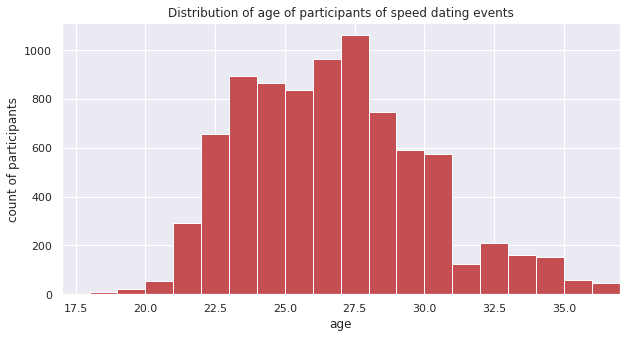

In [ ]:
bins = np.arange(df.age.min(),df.age.max()+0.5, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=df, x="age", bins = bins, facecolor = 'r')
plt.title("Distribution of age of participants of speed dating events")
plt.xlabel("age")
plt.xlim(17, 37)
plt.ylabel("count of participants")
plt.show()

In [ ]:
df['race']

0       'Asian/Pacific Islander/Asian-American'
1       'Asian/Pacific Islander/Asian-American'
2       'Asian/Pacific Islander/Asian-American'
3       'Asian/Pacific Islander/Asian-American'
4       'Asian/Pacific Islander/Asian-American'
                         ...                   
8373                European/Caucasian-American
8374                European/Caucasian-American
8375                European/Caucasian-American
8376                European/Caucasian-American
8377                European/Caucasian-American
Name: race, Length: 8378, dtype: object

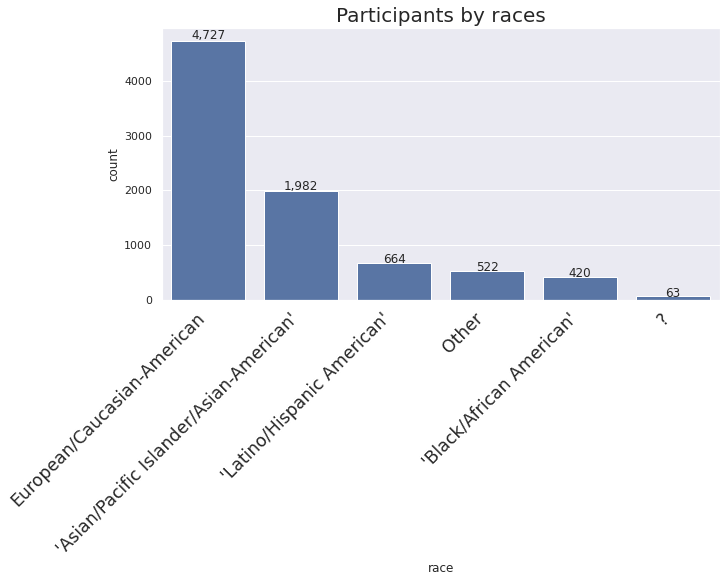

In [ ]:
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[0]
chart = sns.countplot(data = df, x='race', color = base_color, order = df['race'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', 
                      fontweight='light', fontsize='x-large')
plt.title("Participants by races", fontsize=20)

for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

Race feature had 63 missing values that we decided to remove in the following plot.

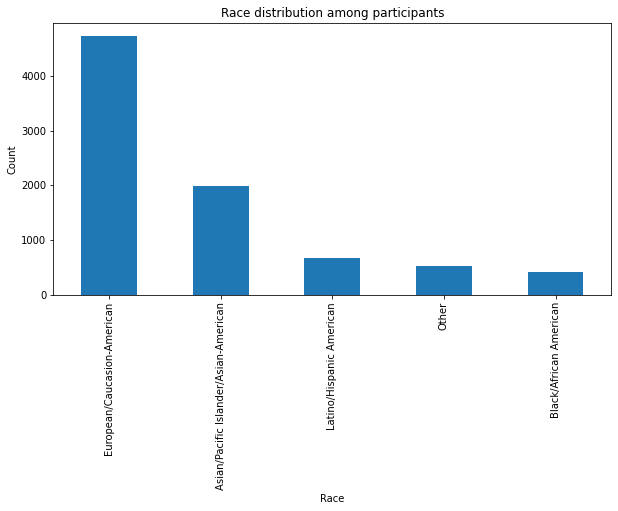

In [57]:
plt.figure(figsize=(10,5))
data['race'].value_counts().plot(kind='bar')
plt.title('Race distribution among participants')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [39]:
data=pd.read_csv('speeddating.csv', encoding= 'unicode_escape')

In [40]:
fields = data.columns

print('Total number of people that participated, assuming person does not appear in more than one wave: {}'.format(len(data['iid'].unique())))
print('Total number of dates occurred: {}'.format(len(data.index)))

Total number of people that participated, assuming person does not appear in more than one wave: 551
Total number of dates occurred: 8378


In [41]:
pd.options.display.max_columns = None

data.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                     "mn_sat":"median_sat",
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                     "dec_o":"partner's decision",
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date",
                     "dec": "Decision"}, inplace=True)

race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}

field_replacement={1:"Law",
                   2:"Math",
                   3:"Social Science, Psychologist",
                   4:"Medican Science, Pharmaceuticals, and Bio Tech",
                   5:"Engineering",
                   6:"English/Creative Writing / Journalism",
                   7:"History/ Religion/ Philosophy",
                   8:"Business/Econ/Finance",
                   9:"Education, Academia",
                   10:"Biological Sciences / Chemistry/ Physics",
                   11:"Social Work",
                   12:"Undergrad/undecided",
                   13:"Political Science/ International Affairs",
                   14:"Film",
                   15:"Fine Arts / Arts Administration",
                   16:"Languages",
                   17:"Architecture",
                   18:"Other"}

career_replacement={1: "Lawyer",
                   2:  "Academic / Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking / Consulting /Finance / Marketing/ Business /CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International /Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports / Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}
length_replacement={1:"Too little",
                   2: "Too much",
                   3: "Just Right"}
goal_replacement={1:"Seemed like a fan night out",
                 2: "To meet new people",
                 3: "To get a date",
                 4:"Looking for serious relationship",
                 5:"To say I did it",
                 6: "Other"}
frequency_replacement={1:"Several times a week",
                      2: "Twice a week",
                      3: "Once a week",
                      4: "Twice a month",
                      5: "Once a month",
                      6: "Several times a year",
                      7: "Almost never"}

In [42]:
import numpy as np
data["Gender"].replace({0:"Female",1:"Male"}, inplace=True)
data["Condition"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
data["match"].replace({1:"Yes",0:"No"}, inplace=True)
data["samerace"].replace({1:"Yes",0:"No"},inplace=True)
data["race of partner"].replace(race_replacement, inplace=True)
data["partner's decision"].replace(decision_replacement, inplace=True)
data["field_cd"].replace(field_replacement, inplace=True)
data["race"].replace(race_replacement, inplace=True)
data["career_c"].replace(career_replacement, inplace=True)
data["length"].replace(length_replacement, inplace=True)
data["numdat_2"].replace({1:"Too few", 2: "Too many", 3: "Just Right"}, inplace=True)
data["date_3"].replace({1:"Yes", 2:"No", 0:np.nan}, inplace=True)
data["goal"].replace(goal_replacement, inplace=True)
data["frequency of date"].replace(frequency_replacement, inplace=True)
data["go_out"].replace(frequency_replacement, inplace=True)
# data["dec"].replace(decision, inplace=True)
display(data)

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,Decision,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,Na

In [43]:
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(data))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(data)

,missing_values(%),missing_values(numbers)
num_in_3,92.026737,7710
numdat_3,82.143710,6882
date_3,82.119838,6880
expnum,78.515159,6578
sinc7_2,76.665075,6423
...,...,...
wave,0.000000,0
Condition,0.000000,0
idg,0.000000,0
Gender,0.000000,0


In [44]:
print(data.columns.tolist())

['iid', 'id', 'Gender', 'idg', 'Condition', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age of partner', 'race of partner', 'partner stated preference', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', "partner's decision", 'partner rating of attributes', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'median_sat', 'tuition', 'race', 'race importance', 'religion importance', 'originally from', 'zipcode', 'income', 'goal', 'frequency of date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 's

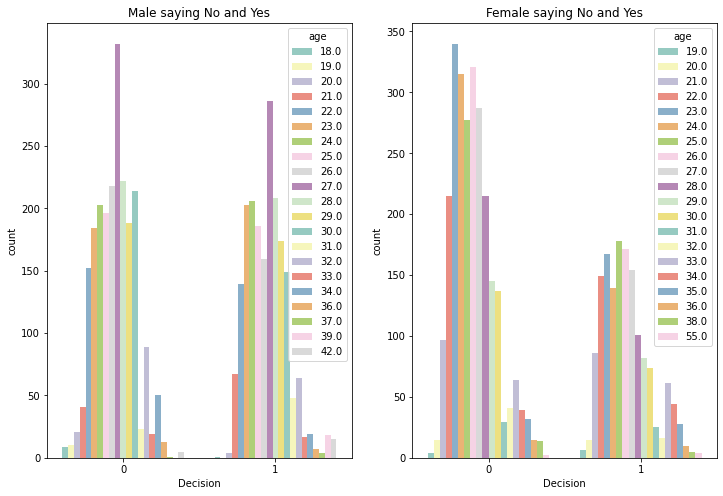

In [50]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=[12,8])
sns.countplot(data=data[data.Gender =="Male"], hue ="age", x="Decision", ax=ax1, palette="Set3").set_title("Male saying No and Yes");
sns.countplot(data=data[data.Gender =="Female"], hue ="age", x="Decision", ax=ax2, palette="Set3").set_title("Female saying No and Yes");

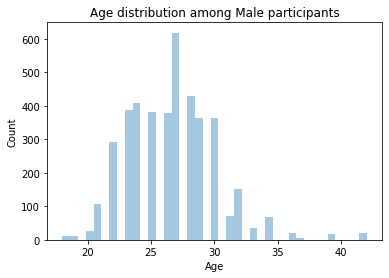

In [53]:
data1 = data[data.Gender == 'Male']
sns.distplot(data1['age'],  kde=False)

plt.title('Age distribution among Male participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

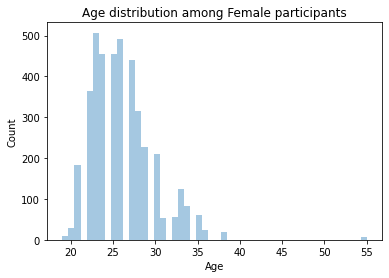

In [54]:
data1 = data[data.Gender == 'Female']
sns.distplot(data1['age'],  kde=False)

plt.title('Age distribution among Female participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

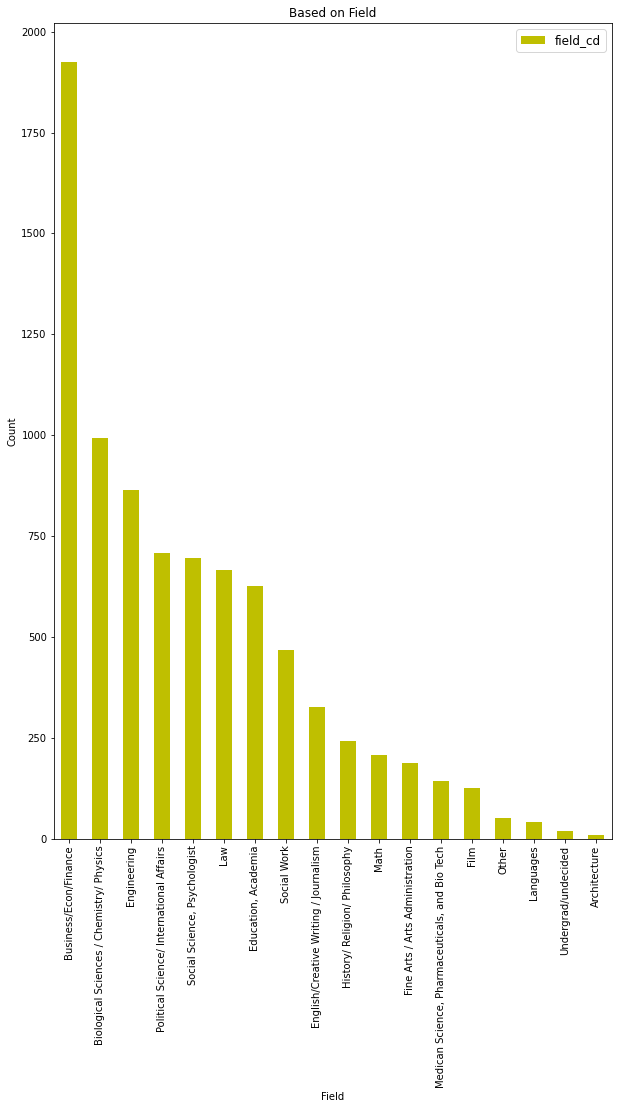

In [58]:
data['field_cd'].value_counts().plot(kind='bar',color="y",figsize=(10,15))

plt.legend(prop={'size': 12})
plt.title('Based on Field')

plt.xlabel('Field')
plt.ylabel('Count')
plt.show()